<a href="https://colab.research.google.com/github/SaiDivyakilari/Data-Science/blob/main/ReCell_Pricing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
!jupyter nbconvert "/content/drive/MyDrive/McCombs Data Science/Supervised Learning/SLF_Project_LearnerNotebook_FullCode.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/McCombs Data Science/Supervised Learning/SLF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 27 image(s).
[NbConvertApp] Writing 2407402 bytes to /content/drive/MyDrive/McCombs Data Science/Supervised Learning/SLF_Project_LearnerNotebook_FullCode.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # connecting to google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to split the data into train and test set
from sklearn.model_selection import train_test_split

#to build a model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

## Loading the dataset

In [ ]:
used_device_df = pd.read_csv("/content/drive/MyDrive/McCombs Data Science/Supervised Learning/used_device_data.csv")
used_device_df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [ ]:
used_device_df.shape

(3454, 15)

Used device data contains 3454 rows and 15 colummns

In [ ]:
used_device_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Statistical Summary of the data

In [ ]:
used_device_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


###Checking for the duplicates


In [ ]:
used_device_df.duplicated().sum()

np.int64(0)

Used device data doesn't contain any duplicate values.

### Checking for missing values

In [ ]:
used_device_df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


A few attributes of data contains missing values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots


    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    if bins :
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram


    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    plt.show()

#### Normalized used Price

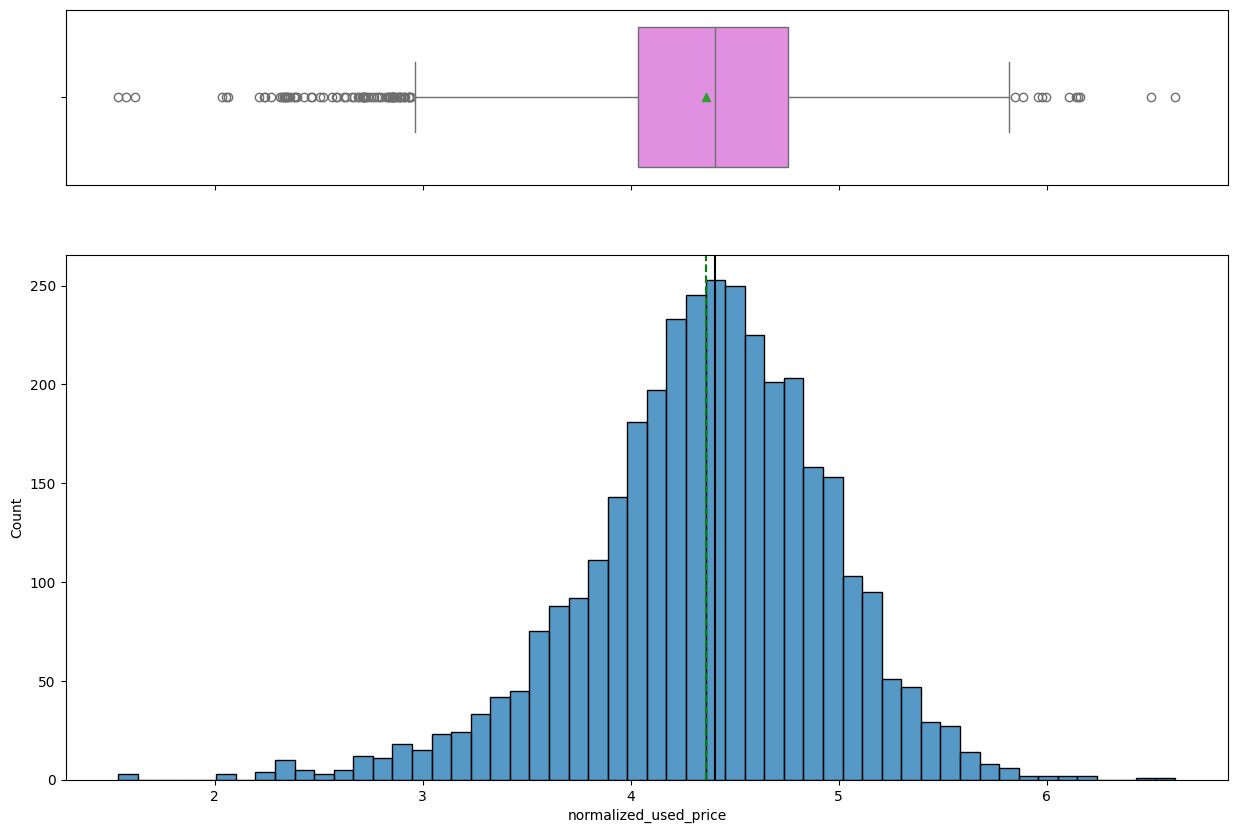

In [ ]:
histogram_boxplot(data=used_device_df,feature="normalized_used_price")


In the above graph, Median > Mean, represents slightly left skewed data.

####Normalized New price

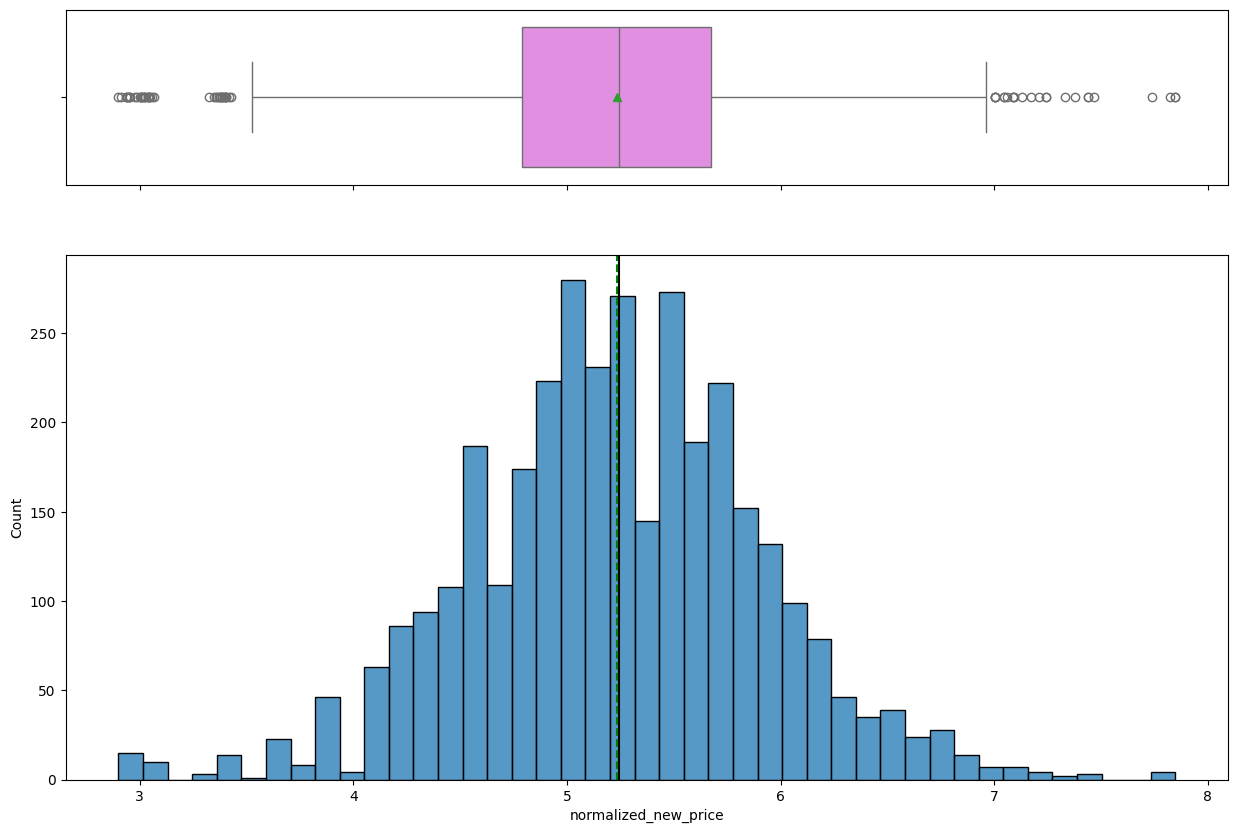

In [ ]:
histogram_boxplot(data=used_device_df,feature="normalized_new_price")

Median ~ Mean, no strong skew is found

####Weight

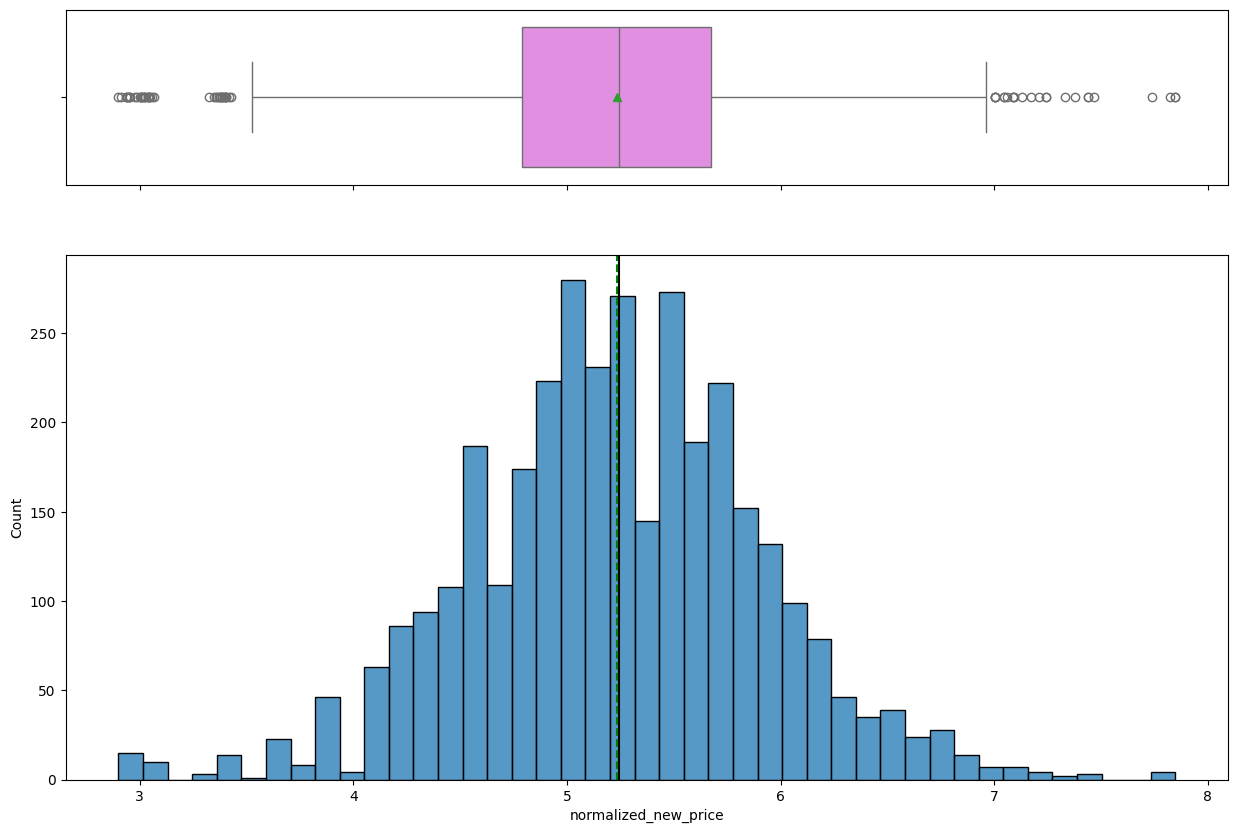

In [ ]:
histogram_boxplot(data=used_device_df,feature="normalized_new_price")

Median is approximately equal to the Mean, No strong Skew is found.

#### Battery

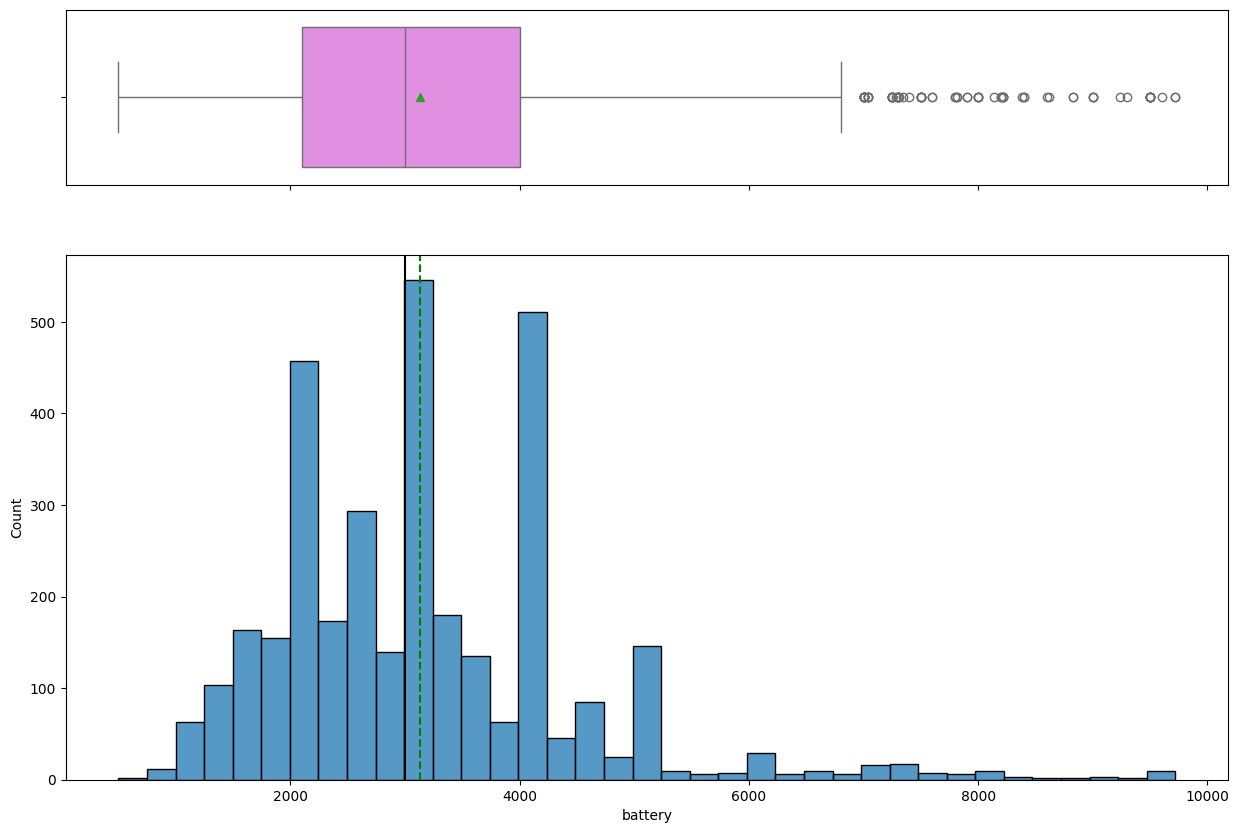

In [ ]:
histogram_boxplot(data=used_device_df,feature="battery")

Here Median < Mean, shows right skewed data. Data is effected by the outliers.

#### Ram

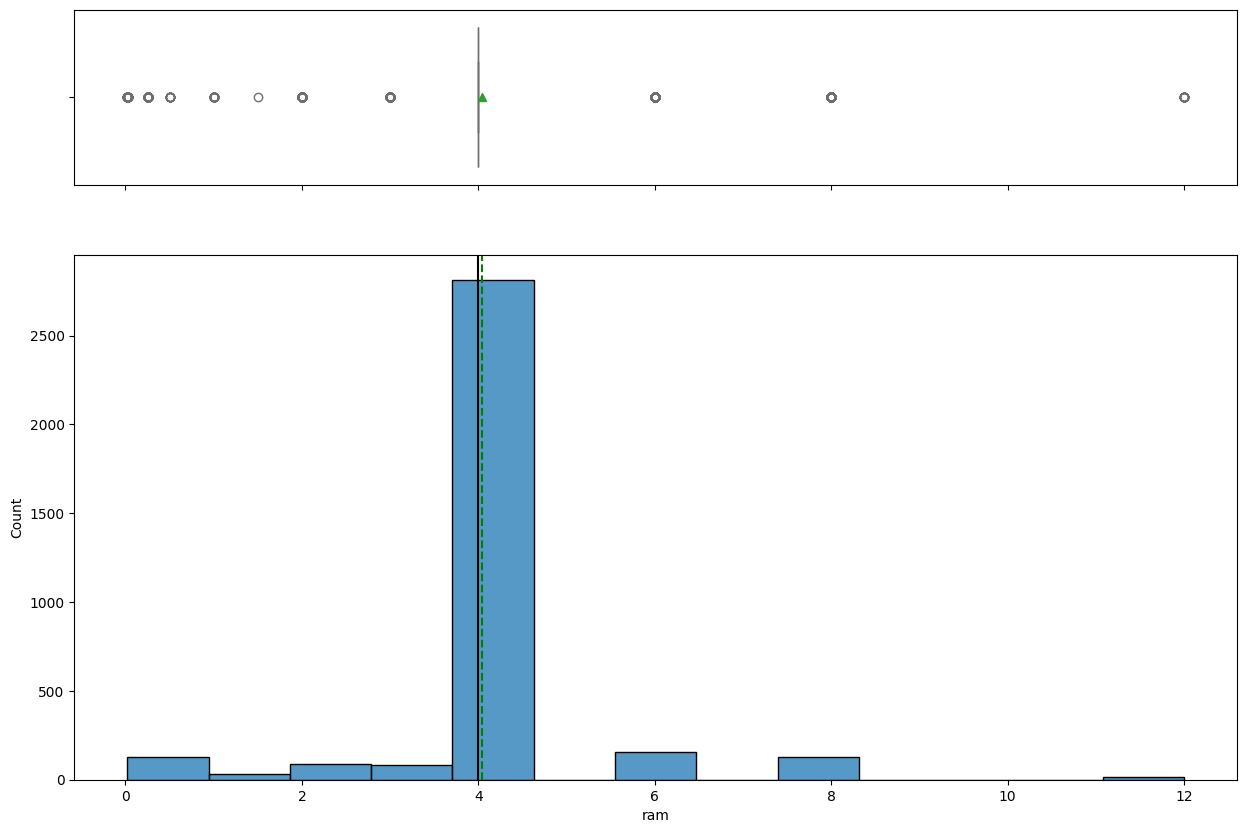

In [ ]:
histogram_boxplot(data=used_device_df,feature="ram")

Majority of devices have very common ram size i.e 4.0 a very few have 6.0 or 8.0

####Internal memory

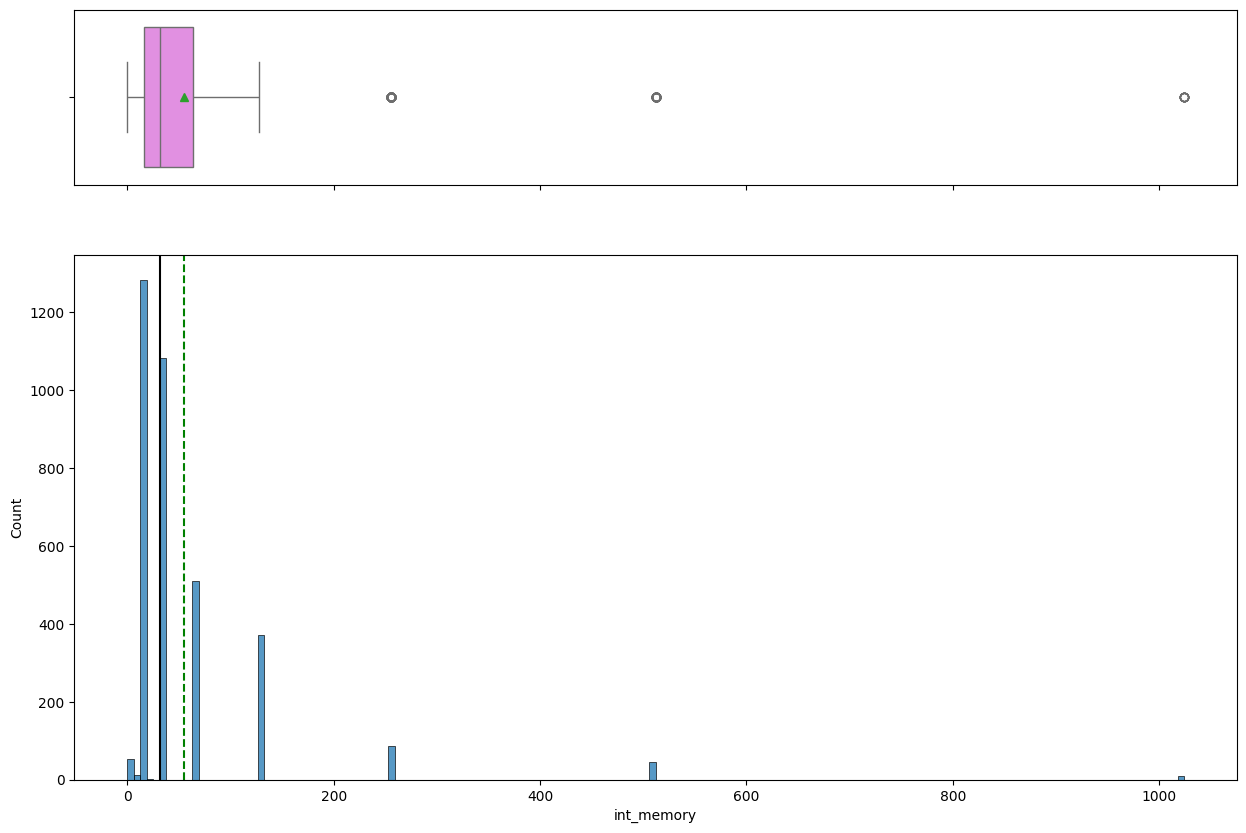

In [ ]:
histogram_boxplot(data=used_device_df,feature="int_memory")


Median  < Mean, right skewed data.

#### Front Camera Megapixels

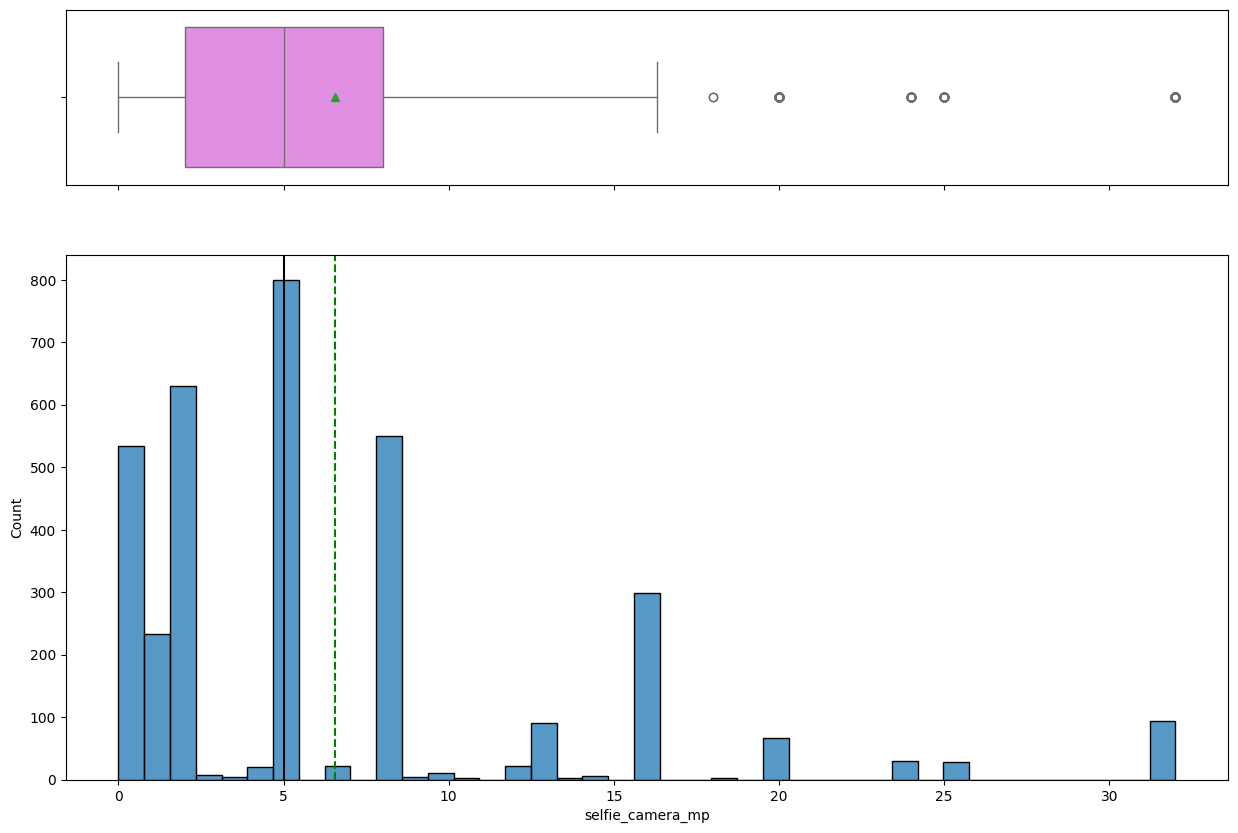

In [ ]:
histogram_boxplot(data=used_device_df,feature="selfie_camera_mp")

Median < Mean, right skewed data i.e positive skewness

#### Back Camera Megapixels

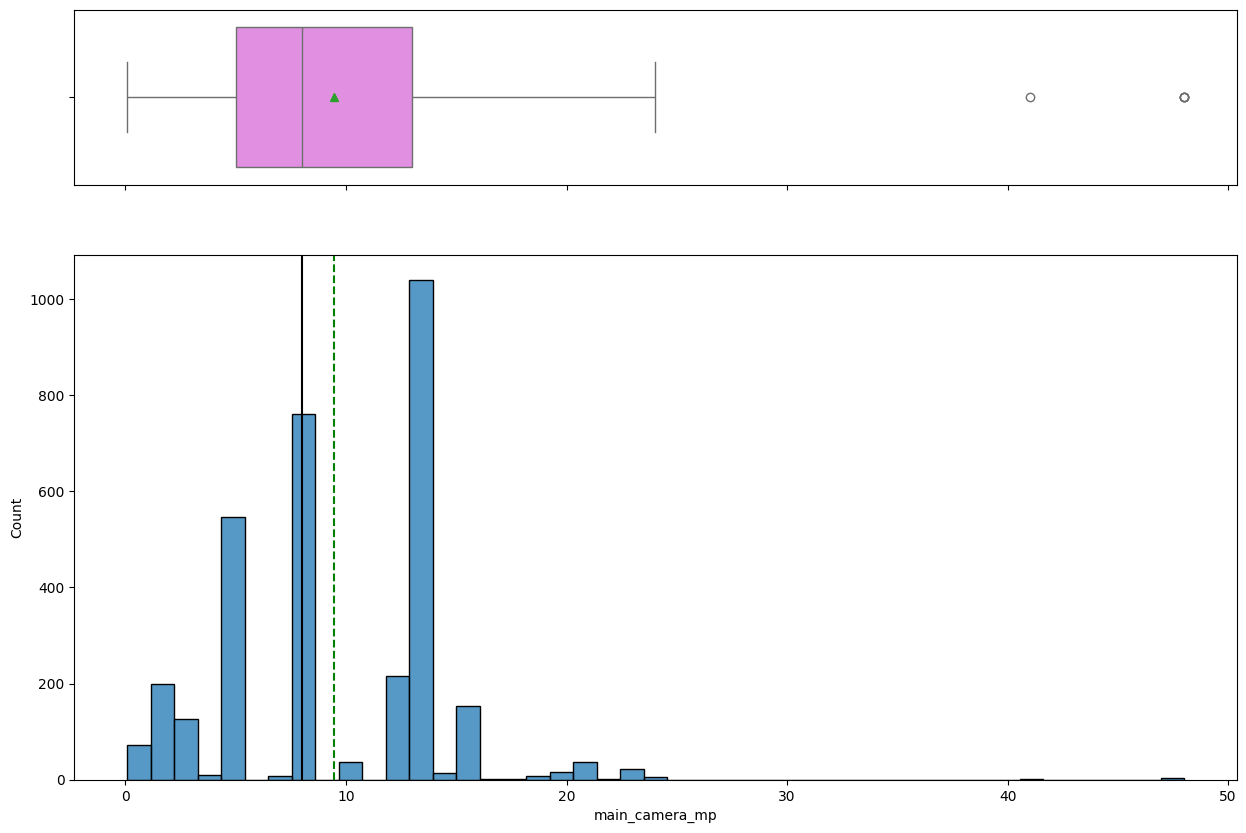

In [ ]:
histogram_boxplot(data=used_device_df,feature="main_camera_mp")

#### Screen Size

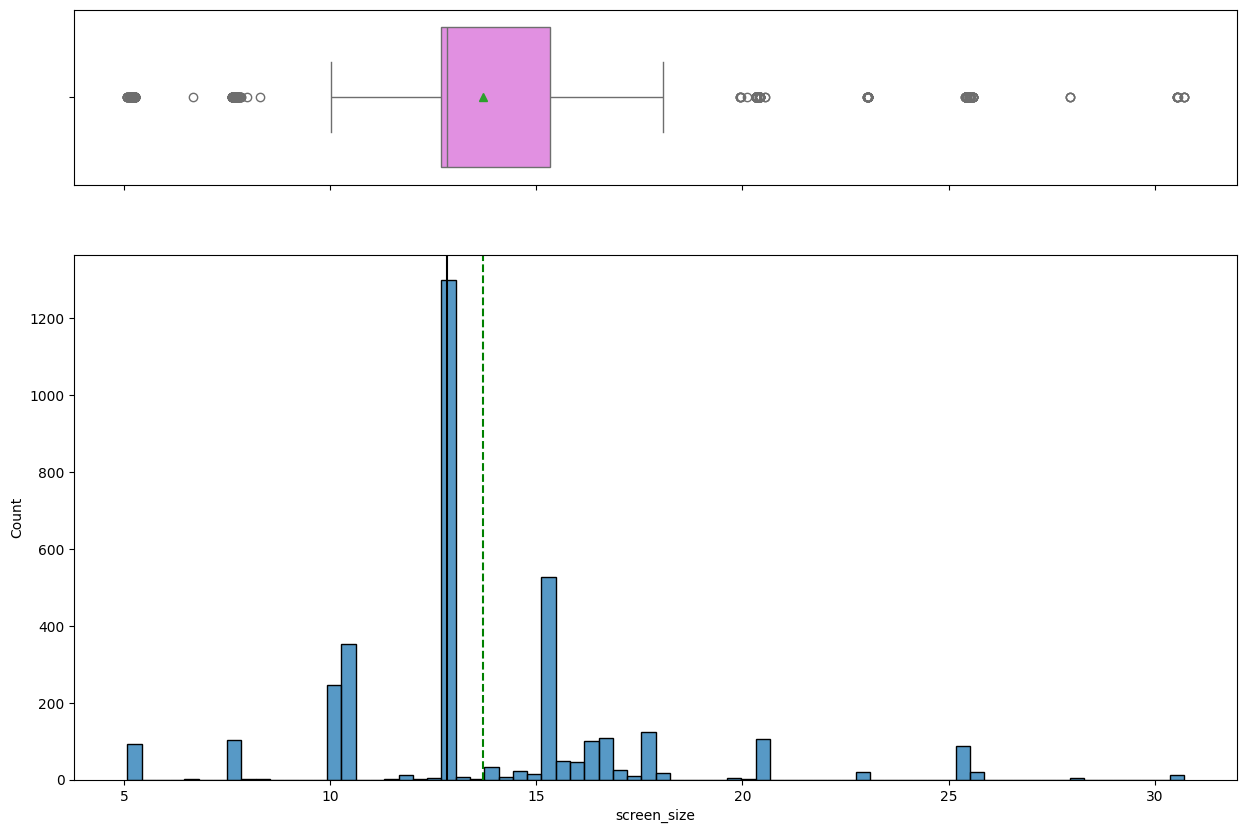

In [ ]:
histogram_boxplot(data=used_device_df,feature="screen_size")

Median < Mean, right skewed data.

#### Days Used

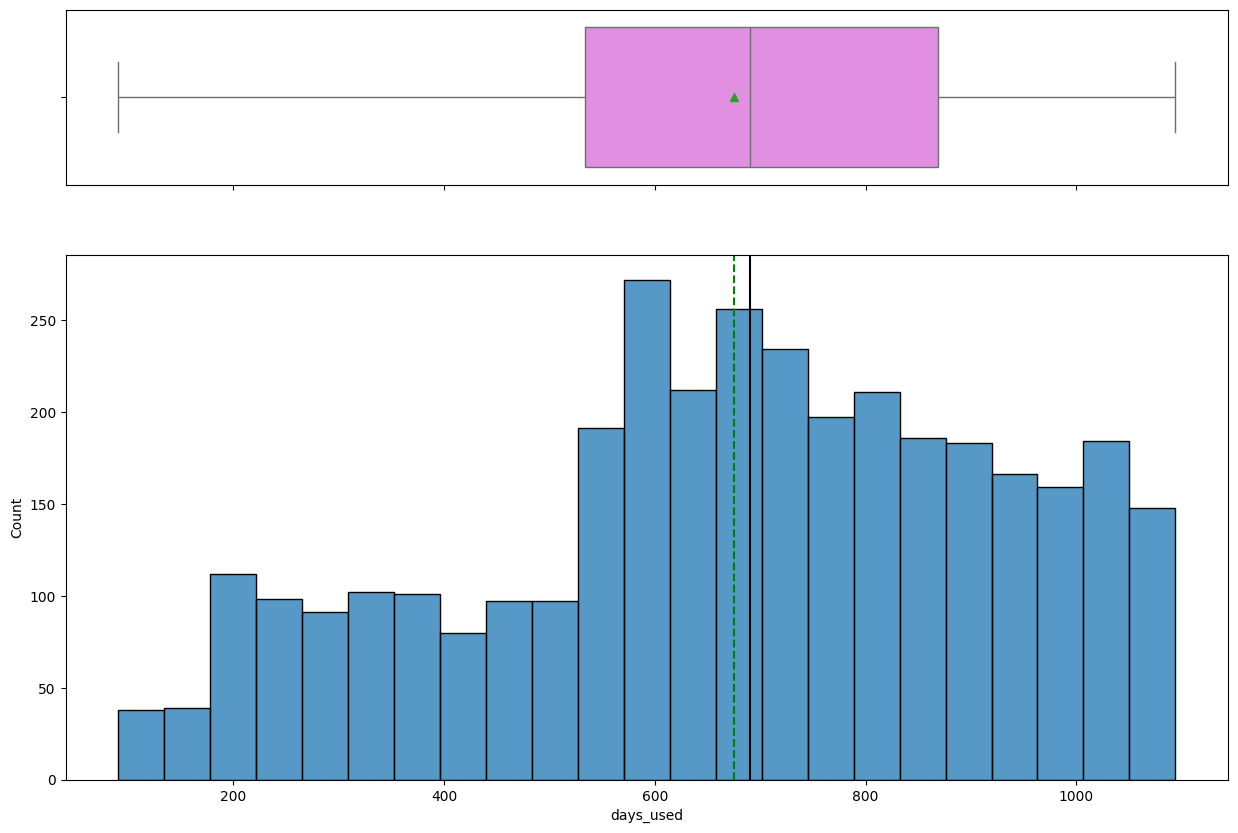

In [ ]:
histogram_boxplot(data=used_device_df,feature="days_used")

Left Skewed data

In [ ]:
#Function to create a labeled bar chart
def labeled_bar_chart(data,feature,percentage=False,n=None):

  #finding the length of a column
  len_col = len(data[feature])
  #number of unique values in column
  count = data[feature].nunique()

  if n is None:
    plt.figure(figsize=(count+2,6))
  else:
    plt.figure(figsize=(n+2,6))

  plt.xticks(rotation=45,fontsize=15)
  ax  = sns.countplot(data = data, x=feature, hue = feature, palette="Paired",order=data[feature].value_counts().index[:n])

  for p in ax.patches:
    if percentage == True:
      label = "{:.1f}%".format(100*p.get_height()/len_col)
    else:
      lable = p.get_height()

    x = p.get_x()+p.get_width()/2
    y = p.get_height()

    ax.annotate(label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)
  plt.show()


#### Brand name

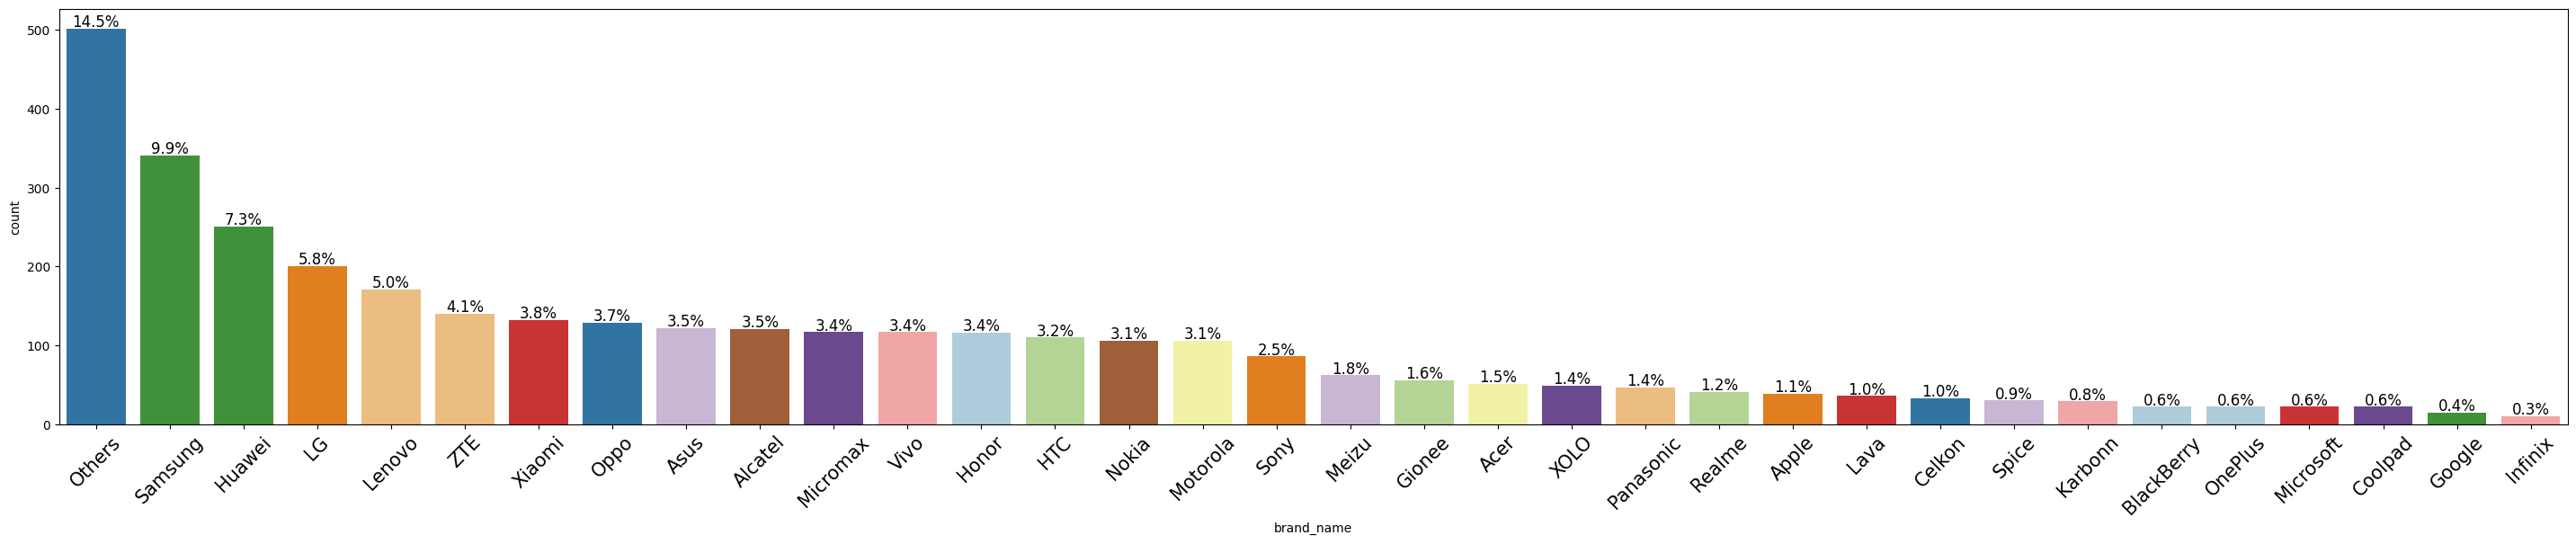

In [ ]:
labeled_bar_chart(data=used_device_df,feature="brand_name",percentage=True)

#### OS

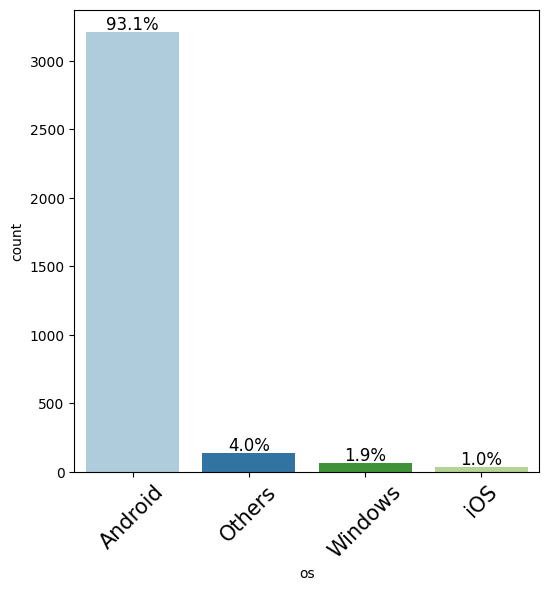

In [ ]:
labeled_bar_chart(data=used_device_df,feature="os",percentage=True)

####4g

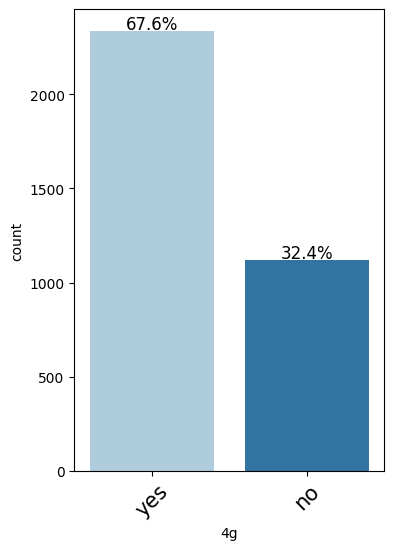

In [ ]:
labeled_bar_chart(data=used_device_df,feature="4g",percentage=True)

#### 5G

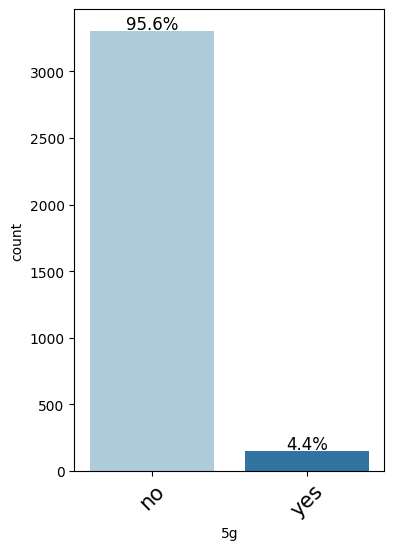

In [ ]:
labeled_bar_chart(data=used_device_df,feature="5g",percentage=True)

####Release year

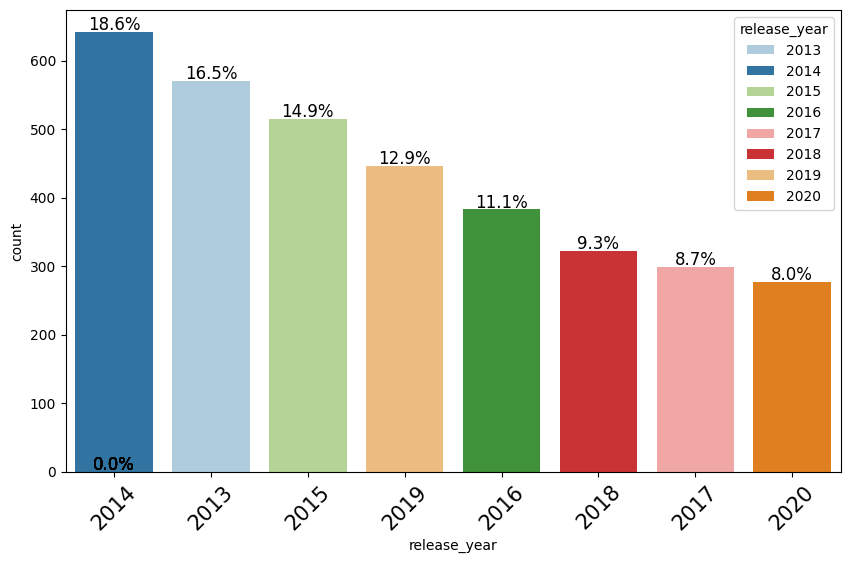

In [ ]:
labeled_bar_chart(data=used_device_df,feature="release_year",percentage=True)

### Multivariate Analysis

<Axes: >

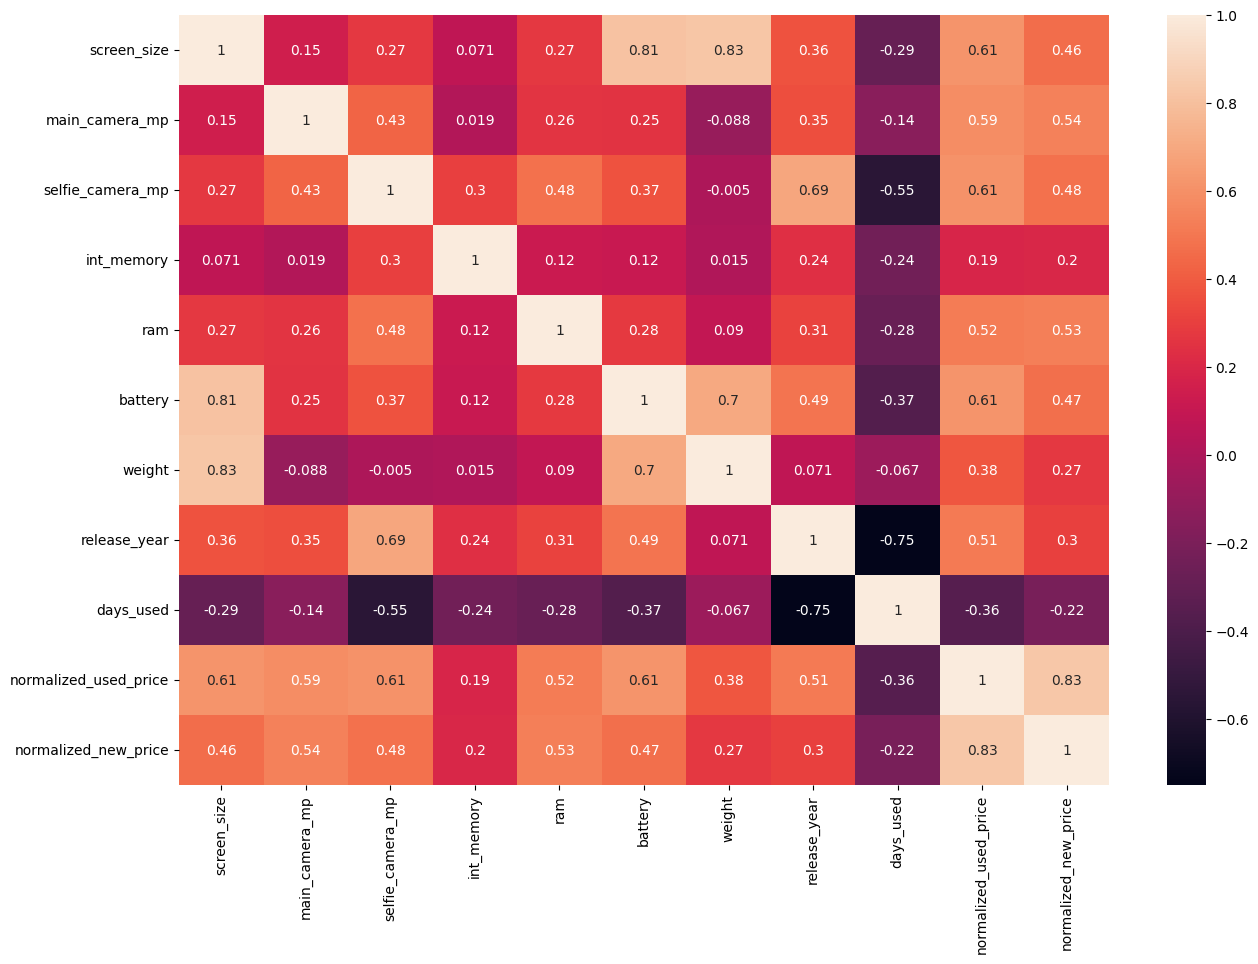

In [ ]:
plt.figure(figsize=(15,10))

numeric_df = used_device_df.select_dtypes(include=['number'])
numeric_list = numeric_df.columns.tolist()
sns.heatmap(data = used_device_df[numeric_list].corr(),annot = True,cbar=True)


Screen Size and Battery are highly correlated

Screen Size and weight are highly correlated.

Days used and release year are weakly correlated.

Days USed and Selfie camera mp are weekly correlated.

####Plotting normalized used price data

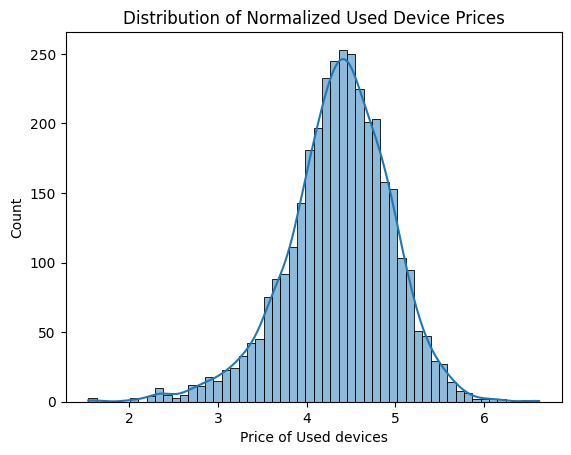

In [ ]:
sns.histplot(data=used_device_df,x="normalized_used_price",kde=True)
plt.xlabel("Price of Used devices")
plt.title("Distribution of Normalized Used Device Prices")
plt.show()

The distribution of Normalized used prices is Normal

#### Used Device Market Share By Operating System

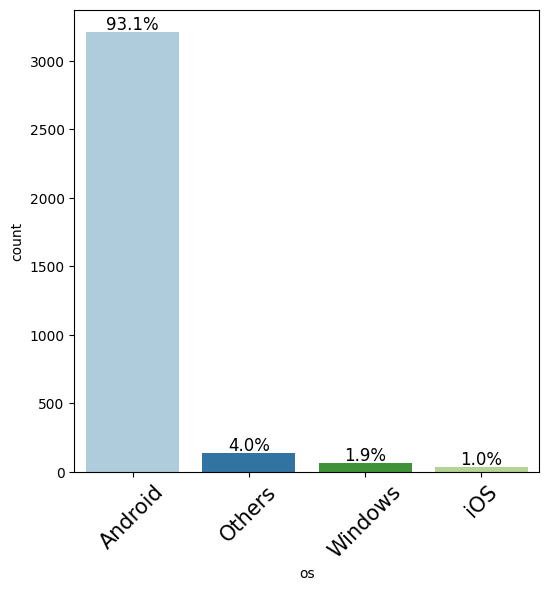

In [ ]:
labeled_bar_chart(used_device_df,"os",percentage=True)


Android takes around 93.1% of Used device market share.

#### Brand name Vs Ram

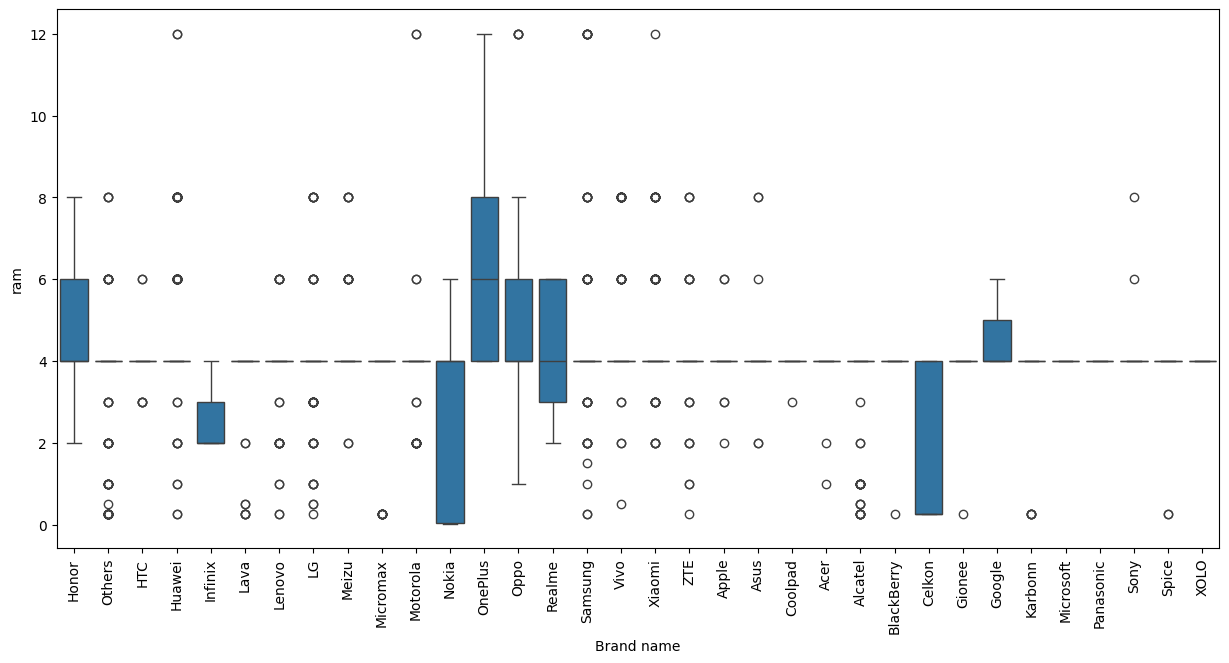

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=used_device_df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.xlabel("Brand name")
plt.show()

OnePlus devices in this dataset have higher RAM.

Nokia and Celkon devices tend to have low RAM.

#### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

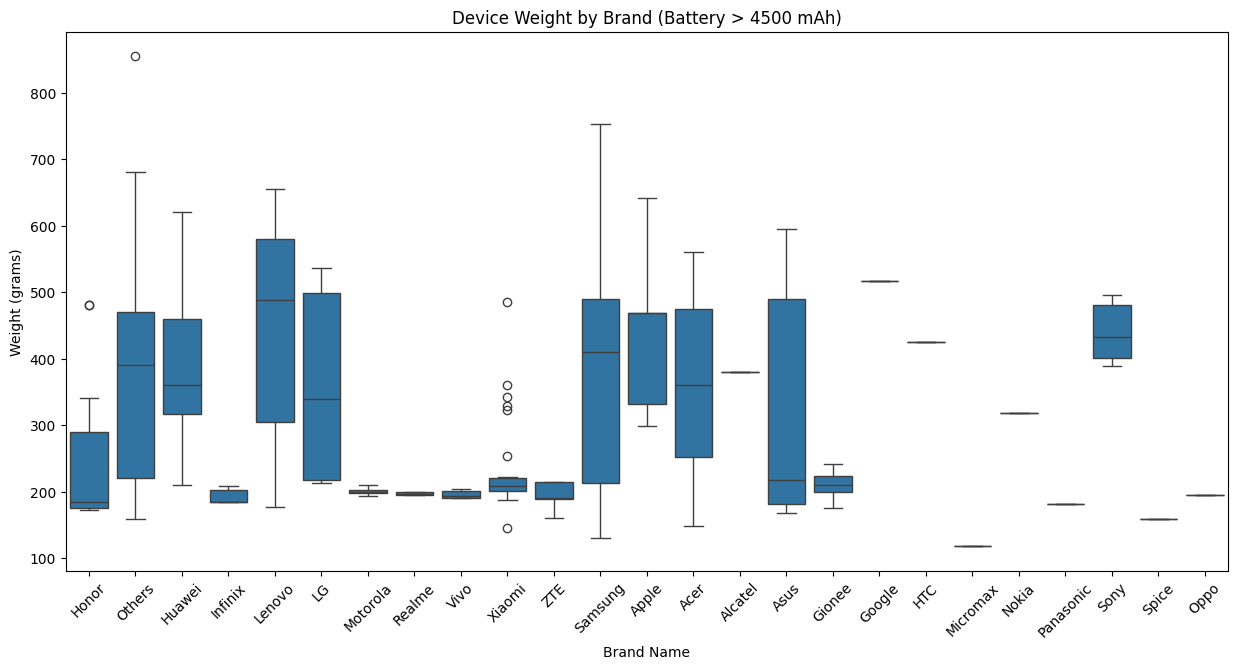

In [ ]:
select_used = used_device_df[used_device_df['battery'] > 4500]
plt.figure(figsize=(15, 7))
sns.boxplot(data=select_used, x="brand_name", y="weight")
plt.xticks(rotation=45)
plt.title("Device Weight by Brand (Battery > 4500 mAh)")
plt.xlabel("Brand Name")
plt.ylabel("Weight (grams)")

plt.show()

####Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

<Figure size 1500x700 with 0 Axes>

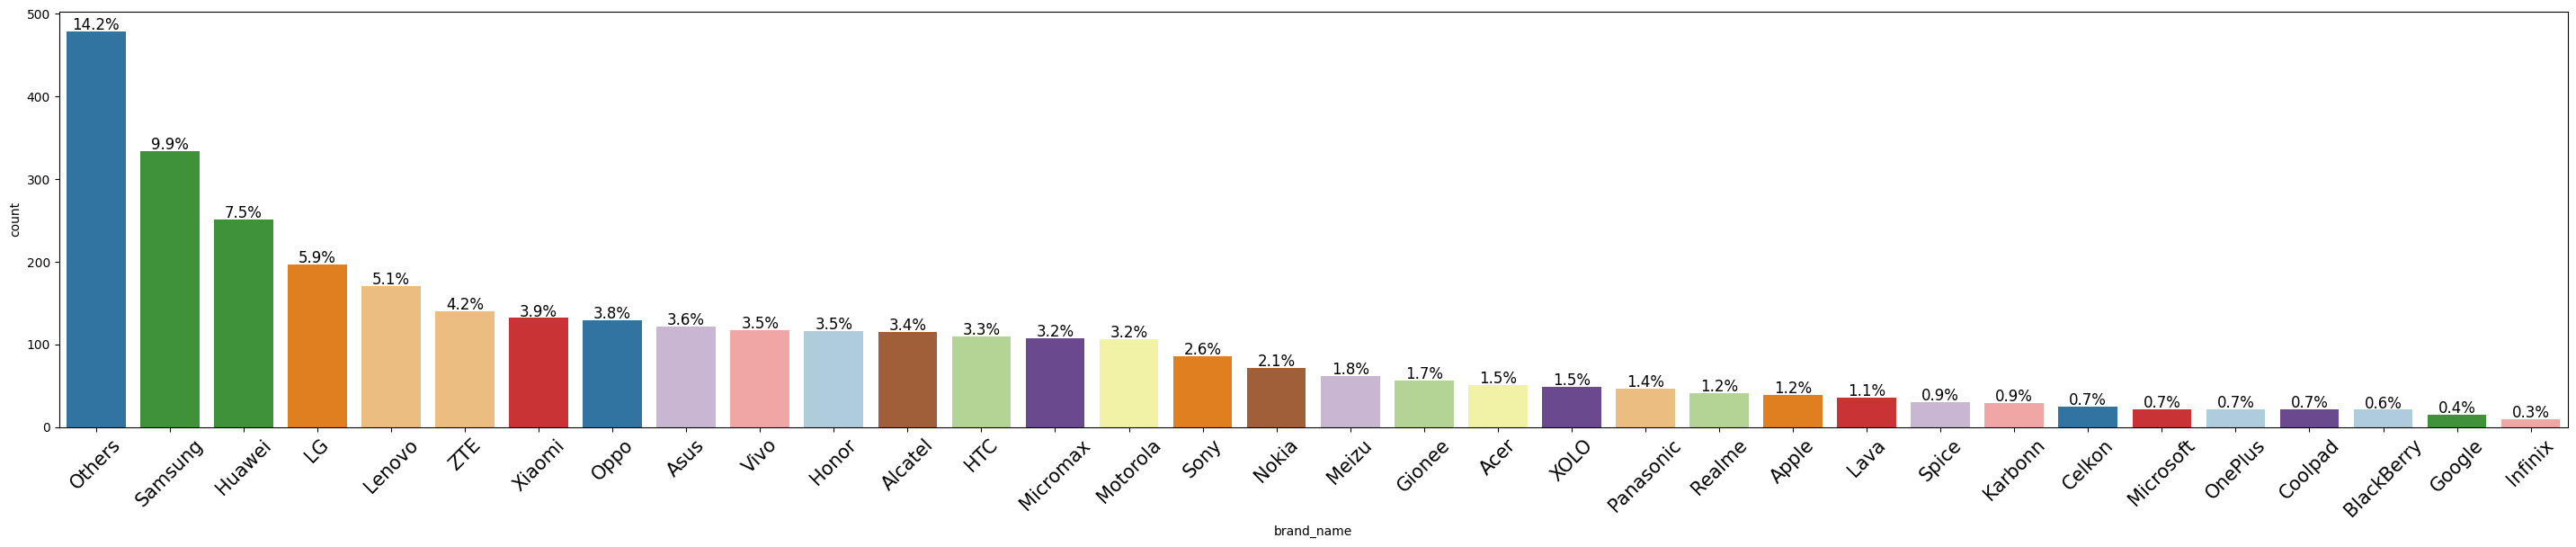

In [ ]:
selected_size = used_device_df[used_device_df['screen_size']>6]
plt.figure(figsize=(15,7))
labeled_bar_chart(data=selected_size,feature="brand_name",percentage=True)


####A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

<Figure size 1500x700 with 0 Axes>

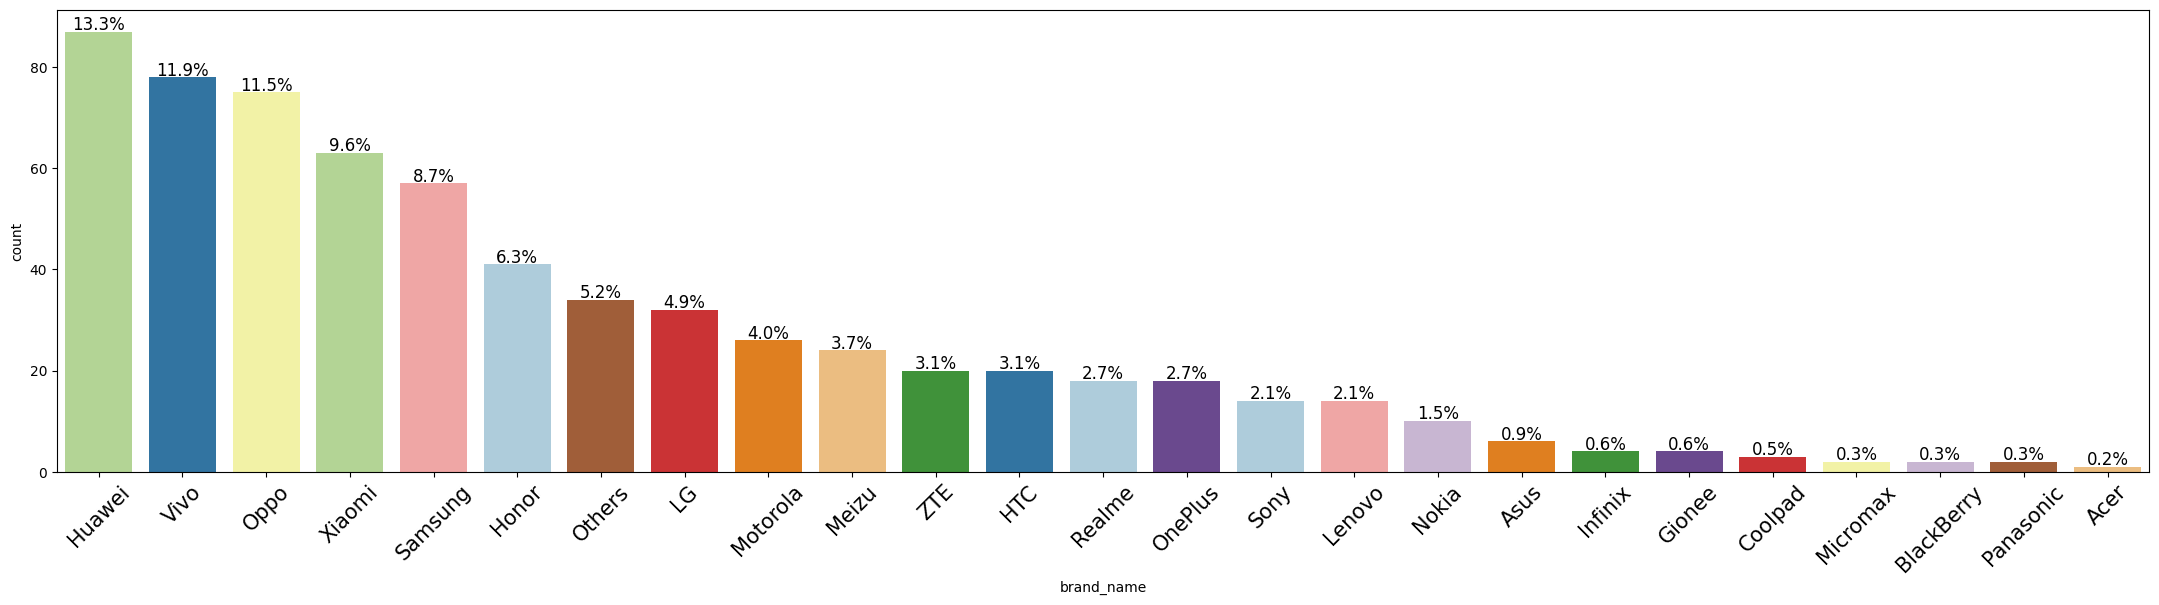

In [ ]:
greater_front_mp= used_device_df[used_device_df['selfie_camera_mp']>8]
plt.figure(figsize=(15,7))
labeled_bar_chart(data=greater_front_mp,feature="brand_name",percentage=True)

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value treatment


In [ ]:
used_device_df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


Few of the columns like 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight' contain null values

In [ ]:
#function for getting all the missing values
null_value_list = []
length = used_device_df.shape[1]
for i in range(length):
    col_name = used_device_df.columns[i]
    if used_device_df[col_name].isna().sum():
        null_value_list.append(col_name)
null_value_list

['main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight']

Getting the list of null value columns

In [ ]:
used_copy = used_device_df.copy()

for col in null_value_list:
  used_copy[col] = used_copy[col].fillna(value=used_copy.groupby(['brand_name'])[col].transform("median"))


used_copy.isnull().sum()


,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


Filling the null values by the column median grouped by brand name. After filling, main_camera_mp still contains null values, filling those values using another method.

In [ ]:
used_copy['main_camera_mp'] = used_copy['main_camera_mp'].fillna(value=used_copy.groupby(['release_year'])['main_camera_mp'].transform("median"))

used_copy.isnull().sum()


,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


Filled null values of main_camera_mp column with the column median grouped by release year.

### Feature Engineering



#### Creating new features
Finding the years since the device was launched from the release year column. The data is collected in 2021.

In [ ]:
used_copy['years_since_launch'] = 2021 - used_copy['release_year']
used_copy.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_since_launch
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,1


In [ ]:
used_copy.drop(columns=['release_year'],inplace=True)

###Outlier Detection

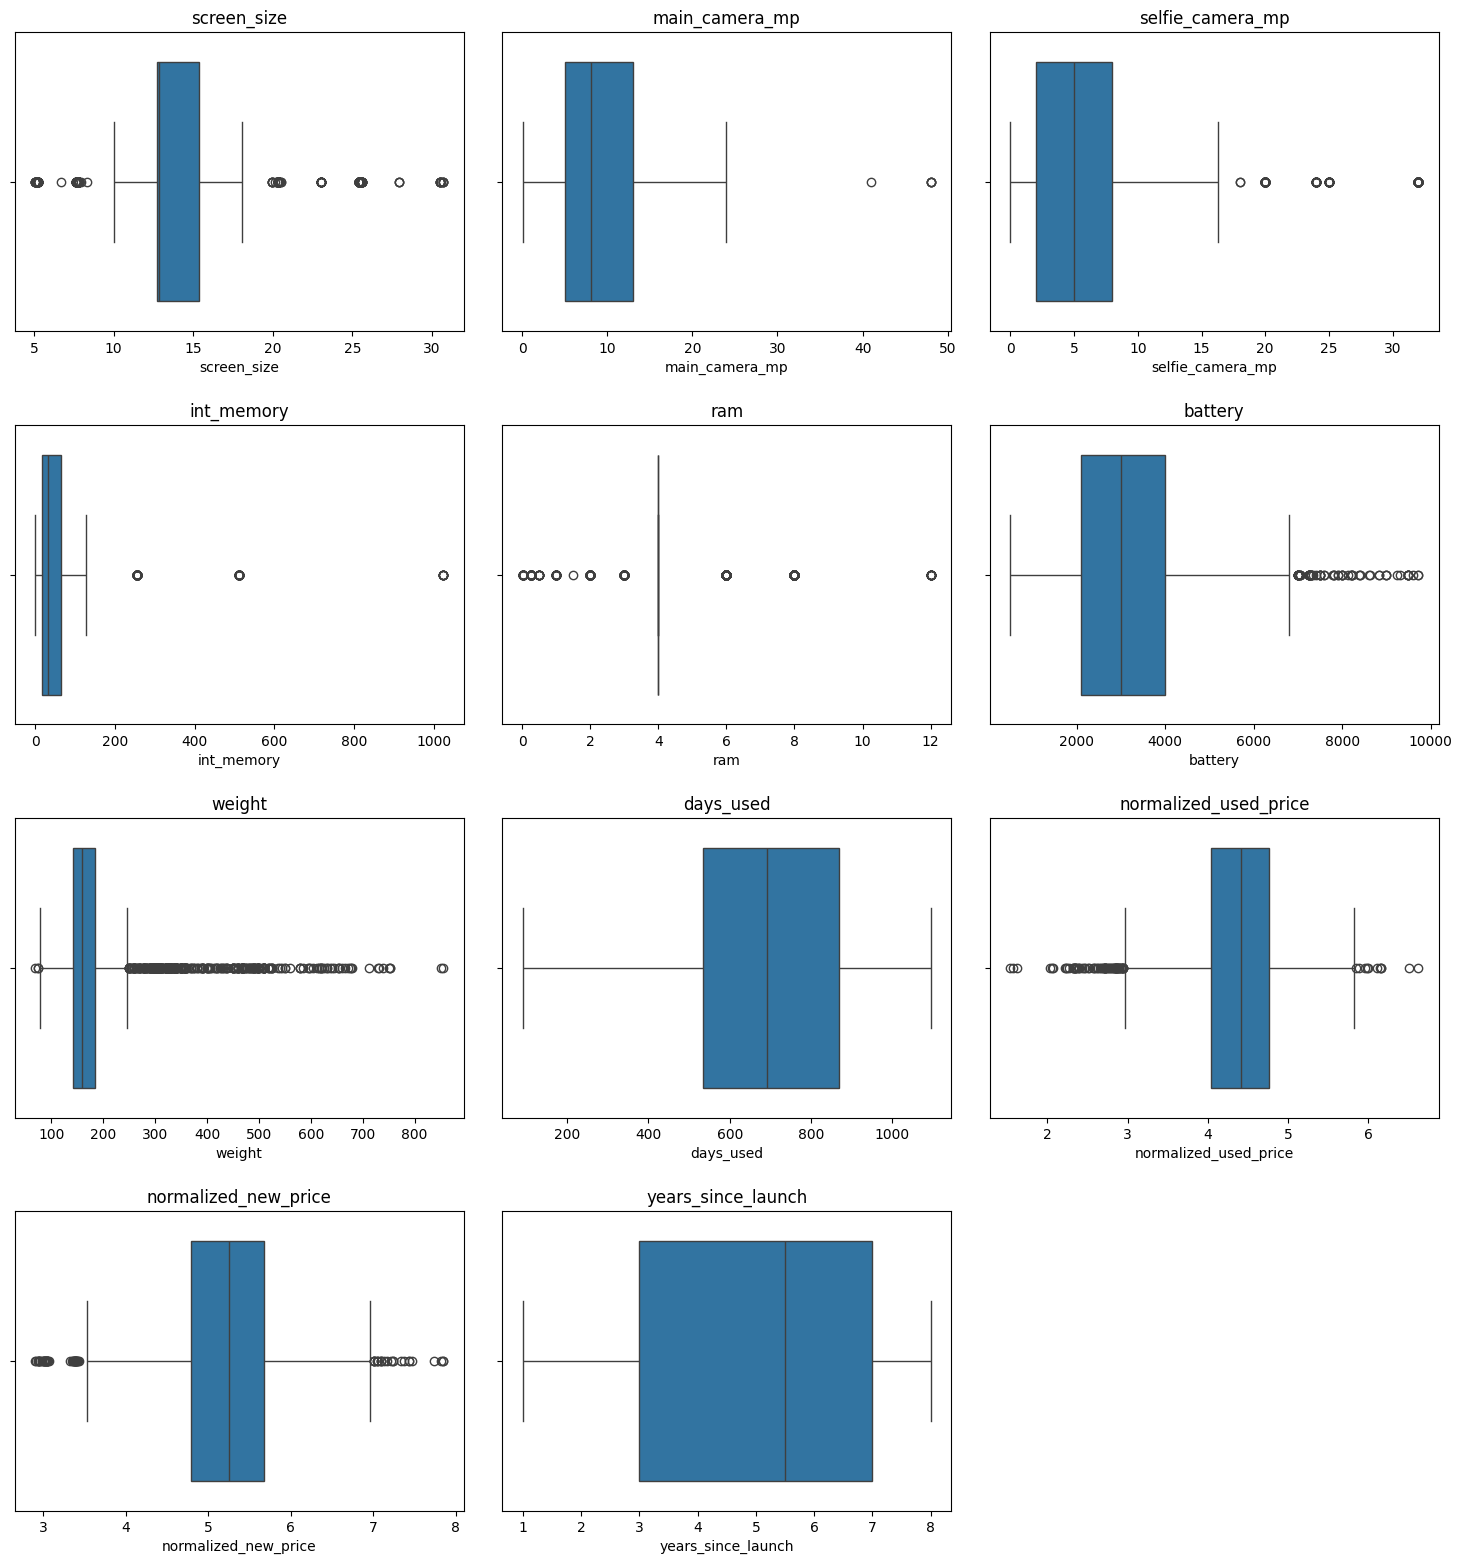

In [ ]:
#extracting numeric columns
import math
numeric_cols = used_copy.select_dtypes(include=['number']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, variable in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=used_copy, x=variable)
    plt.title(variable)

plt.tight_layout(pad=2)
plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: >

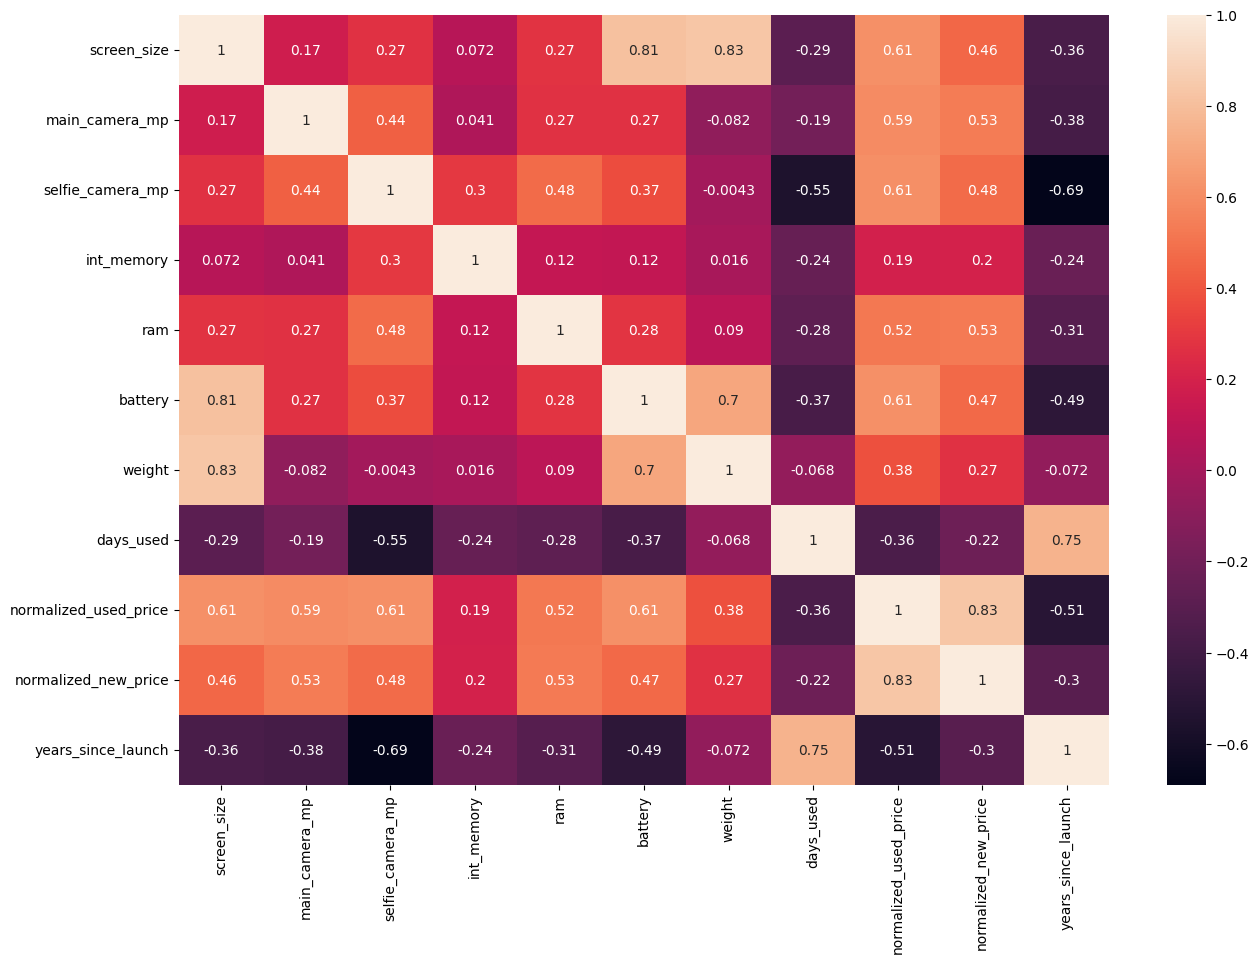

In [ ]:
plt.figure(figsize=(15,10))

numeric_df = used_copy.select_dtypes(include=['number'])
numeric_list = numeric_df.columns.tolist()
sns.heatmap(data = used_copy[numeric_list].corr(),annot = True,cbar=True)


## Data Preperation for Modeling

### Creating Dummies

In [ ]:
# One-hot encoding for categorocal columns
used_copy = pd.get_dummies(used_copy,columns=['brand_name','os'],drop_first=True)
used_copy.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_launch,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS
0,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Binary encoding - For columns with the values Yes or No

used_copy['4g'].unique()

used_copy['4g'] = used_copy['4g'].map({'yes':1,'no':0})

In [ ]:
used_copy['5g'].unique()
used_copy['5g'] = used_copy['5g'].map({'yes':1,'no':0})

In [ ]:
# Since the output of one hot encoding resulted in True, False values, we convert all the columns to float so that every column will be on the same scale
used_copy = used_copy.astype(float)
used_copy.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_launch,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS
0,14.50,1.0,0.0,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.307572,4.715100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.30,1.0,1.0,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.162097,5.519018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.69,1.0,1.0,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.111084,5.884631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.50,1.0,1.0,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.135387,5.630961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.32,1.0,0.0,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.389995,4.947837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Defining Dependent anad Independent Variable
x = used_copy.drop('normalized_used_price',axis=1)
y = used_copy['normalized_used_price']

pd.set_option('display.max_columns', None)
x.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_launch,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS
0,14.50,1.0,0.0,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.30,1.0,1.0,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.69,1.0,1.0,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.50,1.0,1.0,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.32,1.0,0.0,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

,normalized_used_price
0,4.307572
1,5.162097
2,5.111084
3,5.135387
4,4.389995


In [ ]:
## adding a constant
x = sm.add_constant(x)

In [ ]:
# Splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                           19:01:10   Log-Likelihood:                 124.15
No. Observations:                   2417   AIC:                            -150.3
Df Residuals:                       2368   BIC:                             133.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [ ]:
#Adjusted R Square

def adj_r_square(predictors,targets,predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1-((1-r2)*(n-1)/(n-k-1))


In [ ]:
#Mean absolute percentage error
def mape_score(targets,predictions):
  return np.mean(np.abs(targets - predictions) / targets) * 100

In [ ]:
def model_performance(model,predictors,target):
  predictions = model.predict(predictors)

  r2 = r2_score(target,predictions)

  adjusted_r2 = adj_r_square(predictors,target,predictions)

  rmse = np.sqrt(mean_squared_error(target,predictions))

  mae = mean_absolute_error(target,predictions)

  mape = mape_score(target,predictions)

  pref_df = pd.DataFrame({
      "RMSE":rmse,
      "MAE" : mae,
      "R-Squared" : r2,
      "Adj. R-Squared" : adjusted_r2,
      "MAPE" : mape
  }, index=[0])

  return pref_df


In [ ]:
#Checking model performance on train set data

OLS_model_perf_train = model_performance(olsmodel,x_train,y_train)
OLS_model_perf_train

,RMSE,MAE,R-Squared,Adj. R-Squared,MAPE
0,0.229856,0.180302,0.844924,0.841713,4.326213


In [ ]:
#Checking model performance on test set data

OLS_model_perf_test = model_performance(olsmodel,x_test,y_test)
OLS_model_perf_test

,RMSE,MAE,R-Squared,Adj. R-Squared,MAPE
0,0.238482,0.184868,0.842315,0.834487,4.505694


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict used device price within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the used price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Testing for No Multicollinearity

We test using VIF - Variance Inflation factor.
- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calculation(predictors):
  vif = pd.DataFrame()
  vif['Features'] = predictors.columns
  vif['VIF'] =[variance_inflation_factor(predictors.values,i) for i in range (len(predictors.columns))]

  return vif

In [ ]:
vif =pd.DataFrame()
vif = vif_calculation(x_train)
vif

,Features,VIF
0,const,227.678565
1,screen_size,7.677118
2,4g,2.468374
3,5g,1.811042
4,main_camera_mp,2.287763
5,selfie_camera_mp,2.810716
6,int_memory,1.364057
7,ram,2.255246
8,battery,4.081715
9,weight,6.397183


*There are multiple columns with high VIF which shows large correlation.
* We drop the columns with VIF > 5, we drop numeric columns
* We keep the dummy variables



In [ ]:
high_vif_col = ['screen_size','battery','weight','years_since_launch']

#### Remove Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.


In [ ]:
def treat_multicollinearity(predictors, target, high_vif_col):
    adj_r2 = []
    rmse = []

    for col in high_vif_col:
        train = predictors.drop(columns=[col])
        model = sm.OLS(target, train).fit()

        predictions = model.predict(train)
        adj_r2.append(adj_r_square(train, target, predictions))
        rmse.append(np.sqrt(mean_squared_error(target, predictions)))

    # Now create the DataFrame after collecting all results
    temp = pd.DataFrame({
        "col": high_vif_col,
        "Adj. R-squared after_dropping col": adj_r2,
        "RMSE after dropping col": rmse,
    }).sort_values(by="Adj. R-squared after_dropping col", ascending=False)

    temp.reset_index(drop=True, inplace=True)
    return temp


In [ ]:
result = pd.DataFrame()
result = treat_multicollinearity(x_train,y_train,high_vif_col)
result

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.841421,0.230117
1,years_since_launch,0.839981,0.231159
2,screen_size,0.838358,0.232328
3,weight,0.838034,0.232561


- Above results shows dropping of Screen size,weight,Year since launch columns resulted in decrease of Adjusted R2, so lets not drop them.
- Dropping a Battery column resulter in slight decrease of Adj r2, so we can drop this column from the train and test set

In [ ]:
#train and test after dropping columns

x_train2 = x_train.drop(columns=['battery'])
x_test2 = x_test.drop(columns=['battery'])

vif = vif_calculation(x_train2)
vif

,Features,VIF
0,const,227.673618
1,screen_size,7.228017
2,4g,2.436566
3,5g,1.810654
4,main_camera_mp,2.265268
5,selfie_camera_mp,2.809410
6,int_memory,1.364056
7,ram,2.255112
8,weight,5.769383
9,days_used,2.659131


In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     273.9
Date:                   Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                           19:01:18   Log-Likelihood:                 121.41
No. Observations:                   2417   AIC:                            -146.8
Df Residuals:                       2369   BIC:                             131.1
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Dropping the Variables with high p-value

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
predictors = x_train2.copy()
cols = predictors.columns.tolist()

max_p = 1
while len(cols) >1 :
  x_train_temp = predictors[cols]
  model_temp = sm.OLS(y_train,x_train_temp).fit()

  p_val = model_temp.pvalues
  max_p = max(p_val)

  feature_max_p = p_val.idxmax()

  if max_p > 0.05:
    cols.remove(feature_max_p)
  else:
    break

selected_features = cols
print(selected_features)

['const', 'screen_size', '4g', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_launch', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]


In [ ]:
olsmod2 = sm.OLS(y_train,x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     1070.
Date:                   Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                           19:01:18   Log-Likelihood:                 103.97
No. Observations:                   2417   AIC:                            -181.9
Df Residuals:                       2404   BIC:                            -106.7
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

We have successfully removed all the columns with p value greater than 0.05

In [ ]:
#finding the new model performance on the train set
ols2_model_perf_train = model_performance(olsmod2,x_train3,y_train)
ols2_model_perf_train

,RMSE,MAE,R-Squared,Adj. R-Squared,MAPE
0,0.231783,0.181787,0.842312,0.841459,4.361642


In [ ]:
#Finding the new model performance on the test set
ols2_model_perf_test = model_performance(olsmod2,x_test3,y_test)
ols2_model_perf_test

,RMSE,MAE,R-Squared,Adj. R-Squared,MAPE
0,0.236959,0.183593,0.844322,0.842344,4.471303


### Linearity of Variables and Independence of Residuals

* predictor variables must have a linear relation with the dependent variable.
* The Residuals must be independent of each other.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.


In [ ]:
pred_df = pd.DataFrame()

pred_df['Actual values'] = y_train
pred_df['Fitted'] = olsmod2.fittedvalues
pred_df['Residuals'] = olsmod2.resid

pred_df


,Actual values,Fitted,Residuals
0,4.087488,3.855181,0.232307
1,4.448399,4.631543,-0.183144
2,4.315353,4.279987,0.035366
3,4.282068,4.214936,0.067132
4,4.456438,4.465463,-0.009025
...,...,...,...
2412,4.009513,3.979342,0.030171
2413,4.231785,3.963614,0.268171
2414,4.743279,4.803062,-0.059784
2415,5.180209,5.051207,0.129002


#### Fitted Vs Residuals

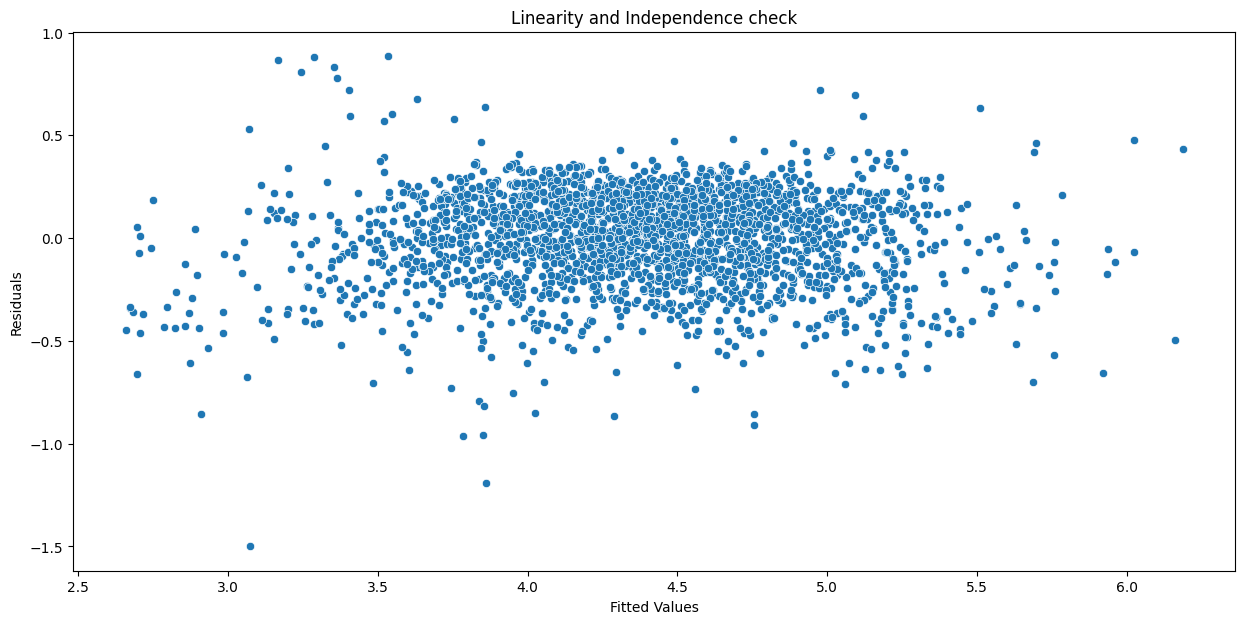

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Linearity and Independence check')
sns.scatterplot(data=pred_df,x='Fitted',y="Residuals")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

* No clear pattern is found, there is a Linear relationship between dependent and independent variables.
* The residuals are also independent of each other

### Test for Normality of Residuals

* Residuals must be normally distributed.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

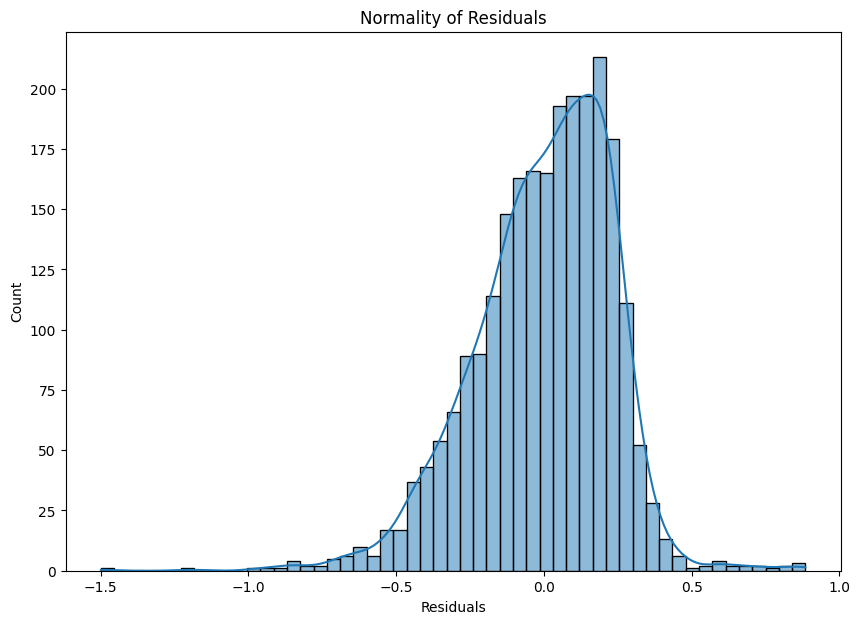

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Normality of Residuals")
sns.histplot(data=pred_df,x="Residuals",kde=True)
plt.xlabel("Residuals")
plt.show()

The above histogram shows the residulas are roughly normally distributed, the data is slightly left-skewed

Q-Q plot

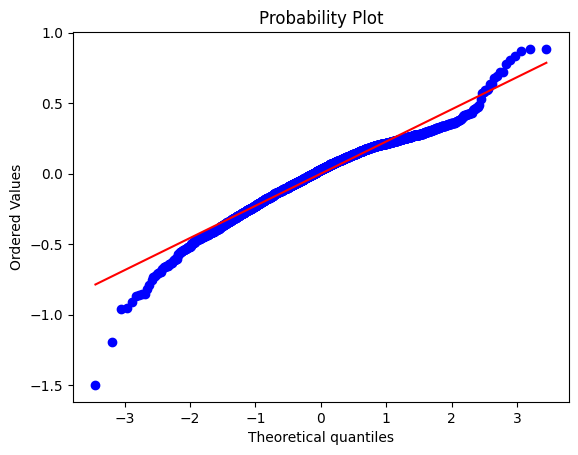

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(pred_df["Residuals"], dist="norm", plot=pylab)
plt.show()

The distribution is roughly normal

####Shapiro-Wilk Test

In [ ]:
stats.shapiro(pred_df["Residuals"])

ShapiroResult(statistic=np.float64(0.9692640849276011), pvalue=np.float64(2.4415151864281843e-22))

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### Test for No Heteroscedasticity

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(pred_df["Residuals"], x_train3)
lzip(name, test)

[('F statistic', np.float64(1.04239115474643)),
 ('p-value', np.float64(0.2365066909654138))]

 p-value > 0.05 we can say that the residuals are homoscedastic

## Predictions on Test Data

In [ ]:
predictions = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": predictions})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.373480
2341,3.696103,3.964571
1913,3.592093,3.707825
688,4.306495,4.107480
650,4.522115,5.127401
2291,4.259294,4.390198
40,4.997685,5.442474
1884,3.875359,4.063810
2538,4.206631,4.042500
45,5.380450,5.275778


We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()



In [ ]:
olsmodel_final = sm.OLS(y_train,x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     1070.
Date:                   Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                           19:01:19   Log-Likelihood:                 103.97
No. Observations:                   2417   AIC:                            -181.9
Df Residuals:                       2404   BIC:                            -106.7
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#model performance on the train set
olsmodel_final_train_perf = model_performance(olsmodel_final,x_train_final,y_train)
olsmodel_final_train_perf

,RMSE,MAE,R-Squared,Adj. R-Squared,MAPE
0,0.231783,0.181787,0.842312,0.841459,4.361642


In [ ]:
#model performance on test data
olsmodel_final_test_perf = model_performance(olsmodel_final,x_test_final,y_test)
olsmodel_final_test_perf

,RMSE,MAE,R-Squared,Adj. R-Squared,MAPE
0,0.236959,0.183593,0.844322,0.842344,4.471303


Final model demonstrates closely matched training and test performance (R² ≈ 0.84, RMSE ≈ 0.23), indicating no signs of overfitting.

* The model is able to explain ~84% of the variation in the data.
* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.
* The MAPE on the test set suggests we can predict within 4.4% of the used device price.
* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes.



## Actionable Insights

1. **Device Age Impacts Resale Price**
   The model confirms that as devices age (`years_since_launch`), their value declines significantly, highlighting depreciation as a key pricing factor.

2. **Physical Attributes Influence Perceived Value**
   Features such as `screen_size` and `weight` are strong predictors of price — suggesting that larger and sturdier devices are valued more in the secondary market.

3. **High Predictive Accuracy**
   The model achieved consistent performance across training and test data (R² ≈ 0.84), indicating it generalizes well and can be trusted for future predictions.


##  Recommendations

1. **Prioritize Key Features for Pricing Models**
   Focus on `screen_size`, `weight`, and `years_since_launch` for accurate price prediction. Avoid overloading the model with redundant or low-impact features.

2. **Remove Multicollinear Variables**
   Drop features like `release_year` if `years_since_launch` is already included, to simplify the model and reduce noise.

3. **Integrate Model into Pricing Systems**
   Deploy this model into internal tools or dashboards to automate and standardize the pricing of used devices.

4. **Continuously Update with Market Data**
   Reassess and retrain the model regularly using fresh data to capture evolving trends in consumer preferences and device valuation.

